In [ ]:
import tfv.xarray
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
#open the surface and bottom grids
surface_grid = xr.open_dataset('surface_grid_temp_Vx_Vy.nc')
bottom_grid = xr.open_dataset('bottom_grid_temp_Vx_Vy.nc')
# calcualte the annual and summer means
annual_surface = surface_grid.mean(dim='time')
summer_surface = surface_grid.sel(time=surface_grid['time.month'].isin([12,1,2])).mean(dim='time')
annual_bottom = bottom_grid.mean(dim='time')
summer_bottom = bottom_grid.sel(time=bottom_grid['time.month'].isin([12,1,2])).mean(dim='time')


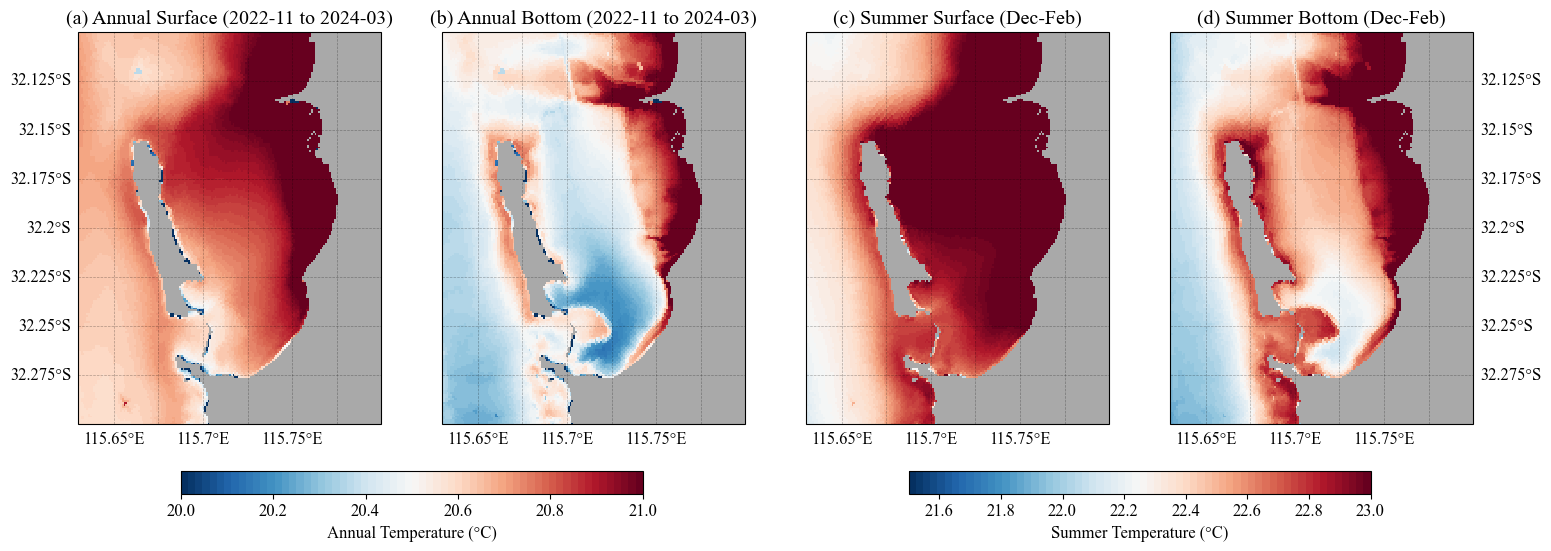

In [49]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs

fig, axs = plt.subplots(1, 4, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent to the bbox
extent = [115.63, 115.80, -32.30, -32.10]

for i, ax in enumerate(axs):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.set_aspect('auto')
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="black", alpha=0.3)
    gl.left_labels = (i == 0)
    gl.right_labels = (i == 3)
    gl.bottom_labels = True
    gl.top_labels = False

# Use RdBu_r but with only 64 discrete colors
cmap64 = plt.get_cmap('RdBu_r', 64)
cmap64.set_bad(color="darkgrey")

# (a) Annual Surface
pcm1 = annual_surface['TEMP'].plot(
    ax=axs[0], cmap=cmap64, add_colorbar=False,
    transform=ccrs.PlateCarree(), vmin=20, vmax=21
)
axs[0].set_title('(a) Annual Surface (2022-11 to 2024-03)')

# (b) Annual Bottom
pcm2 = annual_bottom['TEMP'].plot(
    ax=axs[1], cmap=cmap64, add_colorbar=False,
    transform=ccrs.PlateCarree(), vmin=20, vmax=21
)
axs[1].set_title('(b) Annual Bottom (2022-11 to 2024-03)')

# (c) Summer Surface
pcm3 = summer_surface['TEMP'].plot(
    ax=axs[2], cmap=cmap64, add_colorbar=False,
    transform=ccrs.PlateCarree(), vmin=21.5, vmax=23
)
axs[2].set_title('(c) Summer Surface (Dec-Feb)')

# (d) Summer Bottom
pcm4 = summer_bottom['TEMP'].plot(
    ax=axs[3], cmap=cmap64, add_colorbar=False,
    transform=ccrs.PlateCarree(), vmin=21.5, vmax=23
)
axs[3].set_title('(d) Summer Bottom (Dec-Feb)')

# Shared colorbars (still continuous, but only 64 colors available)
cbar1 = fig.colorbar(pcm1, ax=axs[0:2], orientation='horizontal',
                     fraction=0.05, pad=0.1, shrink=0.8)
cbar1.set_label('Annual Temperature (°C)')

cbar2 = fig.colorbar(pcm3, ax=axs[2:], orientation='horizontal',
                     fraction=0.05, pad=0.1, shrink=0.8)
cbar2.set_label('Summer Temperature (°C)')
# font is times new roman
plt.rcParams['font.family'] = 'Times New Roman'

plt.show()


In [45]:
annual_surface

<xarray.Dataset> Size: 824kB
Dimensions:    (latitude: 200, longitude: 171)
Coordinates:
  * latitude   (latitude) float64 2kB -32.3 -32.3 -32.3 ... -32.1 -32.1 -32.1
  * longitude  (longitude) float64 1kB 115.6 115.6 115.6 ... 115.8 115.8 115.8
Data variables:
    TEMP       (latitude, longitude) float64 274kB nan 20.59 20.59 ... nan nan
    V_x        (latitude, longitude) float64 274kB nan -0.0007005 ... nan nan
    V_y        (latitude, longitude) float64 274kB nan 0.1015 0.1015 ... nan nan

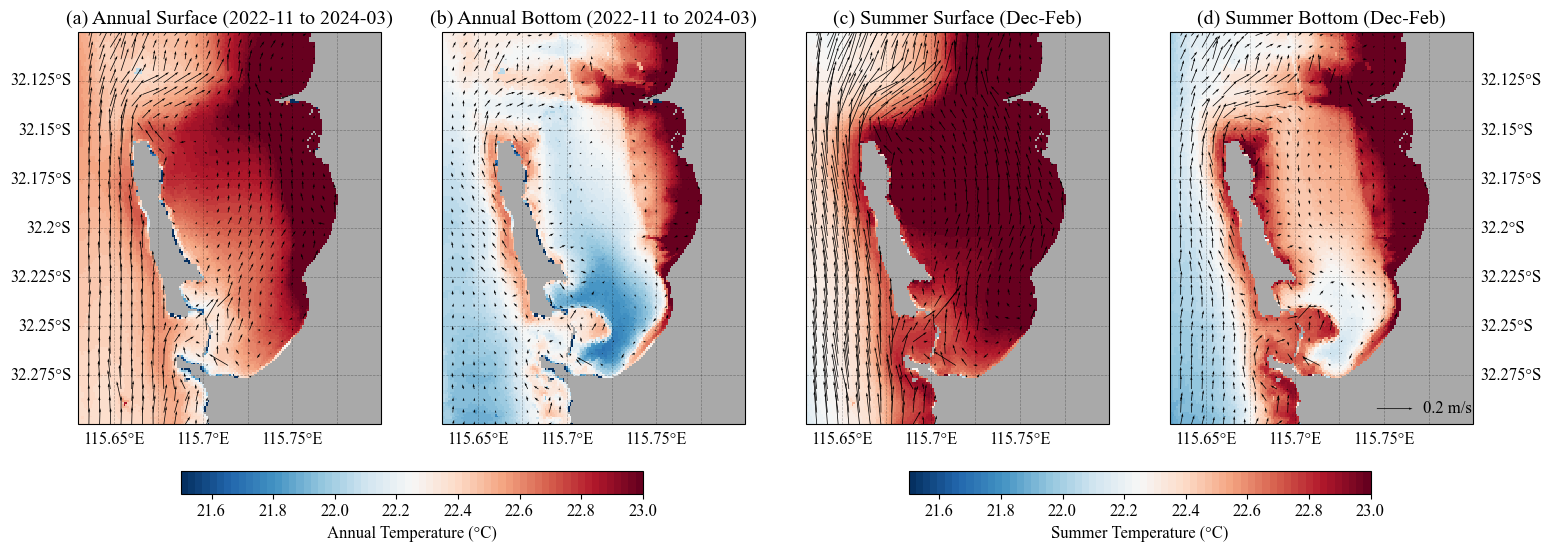

In [103]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({"font.size": 12})

# Create figure with 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent
extent = [115.63, 115.80, -32.30, -32.10]

# Choose arrow density
step = 6

# Configure each subplot
for i, (ax, data, title, vmin, vmax) in enumerate([
    (axs[0], annual_surface, '(a) Annual Surface (2022-11 to 2024-03)', 20, 21),
    (axs[1], annual_bottom, '(b) Annual Bottom (2022-11 to 2024-03)', 20, 21),
    (axs[2], summer_surface, '(c) Summer Surface (Dec-Feb)', 21.5, 23),
    (axs[3], summer_bottom, '(d) Summer Bottom (Dec-Feb)', 21.5, 23)
]):
    # Set extent and aspect
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.set_aspect('auto')

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="black", alpha=0.3)
    gl.left_labels = (i == 0)
    gl.right_labels = (i == 3)
    gl.bottom_labels = True
    gl.top_labels = False

    # Add land and ocean features
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)

    # Temperature background with discrete colormap
    cmap64 = plt.get_cmap('RdBu_r', 64)
    cmap64.set_bad(color="darkgrey")
    pcm = data['TEMP'].plot(
        ax=ax, cmap=cmap64, add_colorbar=False,
        transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax
    )

    # Overlay velocity arrows
    q = ax.quiver(
        data['longitude'][::step], data['latitude'][::step],
        data['V_x'][::step, ::step], data['V_y'][::step, ::step],
        scale_units='xy',
        scale=10, angles='xy',
        transform=ccrs.PlateCarree(),
    )

    # Add quiverkey
    #ax.quiverkey(q, 0.9, 0.95, 0.2, '0.2 m/s', labelpos='E', coordinates='axes', zorder=5)

    # Set title
    ax.set_title(title)

# Shared colorbars
cbar1 = fig.colorbar(pcm, ax=axs[0:2], orientation='horizontal', fraction=0.05, pad=0.1, shrink=0.8)
cbar1.set_label('Annual Temperature (°C)')

cbar2 = fig.colorbar(pcm, ax=axs[2:], orientation='horizontal', fraction=0.05, pad=0.1, shrink=0.8)
cbar2.set_label('Summer Temperature (°C)')
axs[3].quiverkey(q, 0.8, 0.04, 0.2, '0.2 m/s', labelpos='E', coordinates='axes', zorder=5)
plt.show()